In [2]:
import pandas as pd

In [4]:
path_train_base = f'data/train_base.csv'

df = pd.read_csv(path_train_base)
df['year'] = df['MONTH'] // 100
df['month'] = df['MONTH'] % 100
df = df.drop(columns=['MONTH'])

df.head()

,case_id,date_decision,WEEK_NUM,target,year,month
0,0,2019-01-03,0,0,2019,1
1,1,2019-01-03,0,0,2019,1
2,2,2019-01-04,0,0,2019,1
3,3,2019-01-03,0,0,2019,1
4,4,2019-01-04,0,1,2019,1


In [11]:
gpd_df = df[['target', 'month']].loc[
    df['year'] == 2019].groupby(['month']).mean()

gpd_df

,target
month,
1,0.025990
2,0.027385
3,0.026755
4,0.029453
5,0.033006
6,0.025753
7,0.027458
8,0.026726
9,0.034030


In [12]:
pd.read_html('https://cbr.ru/hd_base/dv/?P1=6')

[          Дата         Всего
 0   26.03.2024  1 605 000,00
 1   25.03.2024  1 450 000,00
 2   22.03.2024  1 100 000,00
 3   21.03.2024  1 290 000,00
 4   20.03.2024  1 200 000,00
 5   19.03.2024  1 690 000,00
 6   18.03.2024  1 550 000,00
 7   15.03.2024  1 350 000,00
 8   14.03.2024  1 150 000,00
 9   13.03.2024  1 633 000,00
 10  12.03.2024  2 187 000,00]

In [15]:
df['target'].value_counts()

0    1478665
1      47994
Name: target, dtype: int64

In [1]:
import numpy as np
import pandas as pd

from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
path_train_base = f'train_base.csv'
path_test_base = f'test_base.csv'

train_base = pd.read_csv(path_train_base)
test_base = pd.read_csv(path_test_base)

print(train_base.shape)
print(test_base.shape)

(1526659, 5)
(10, 4)


In [3]:
train_base['year'] = train_base['MONTH'] // 100
train_base['month'] = train_base['MONTH'] % 100
train_base = train_base.drop(columns=['MONTH'])
train_base.head(5)

,case_id,date_decision,WEEK_NUM,target,year,month
0,0,2019-01-03,0,0,2019,1
1,1,2019-01-03,0,0,2019,1
2,2,2019-01-04,0,0,2019,1
3,3,2019-01-03,0,0,2019,1
4,4,2019-01-04,0,1,2019,1


In [4]:
def get_date_interval_info(df):
    df['date_decision'] = pd.to_datetime(df['date_decision'])
    date_delta = df['date_decision'].drop_duplicates().sort_values().diff()
    len_uniq_dates = len(df.date_decision.unique())
    print(
        f'\n Actual date range:  {date_delta.sum().days + 1} day(s).',
        f'\n Total unique dates: {len_uniq_dates} day(s).'
    )

    print(f'\n Min date: {df.date_decision.dt.date.min()}',
          f'\n Max date: {df.date_decision.dt.date.max()}')
    
get_date_interval_info(train_base)


 Actual date range:  644 day(s). 
 Total unique dates: 644 day(s).

 Min date: 2019-01-01 
 Max date: 2020-10-05


([<matplotlib.patches.Wedge at 0x7f0736a16640>,
 [Text(-1.0946395745925022, 0.1084629048843239, '0'),
  Text(1.0946395733231236, -0.10846291769526761, '1')],
 [Text(-0.5970761315959102, 0.05916158448235849, '96.9%'),
  Text(0.5970761309035219, -0.05916159147014596, '3.1%')])

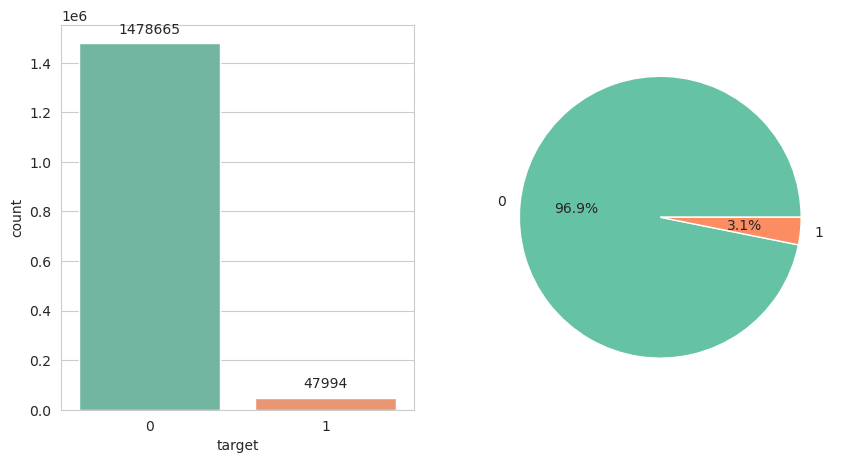

In [5]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
ax = sns.countplot(data=train_base, x='target', palette="Set2")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.subplot(1,2,2)
plt.pie(train_base['target'].value_counts(), labels=['0','1'], autopct='%1.1f%%', colors=sns.color_palette("Set2"))

(0.0, 10000.0)

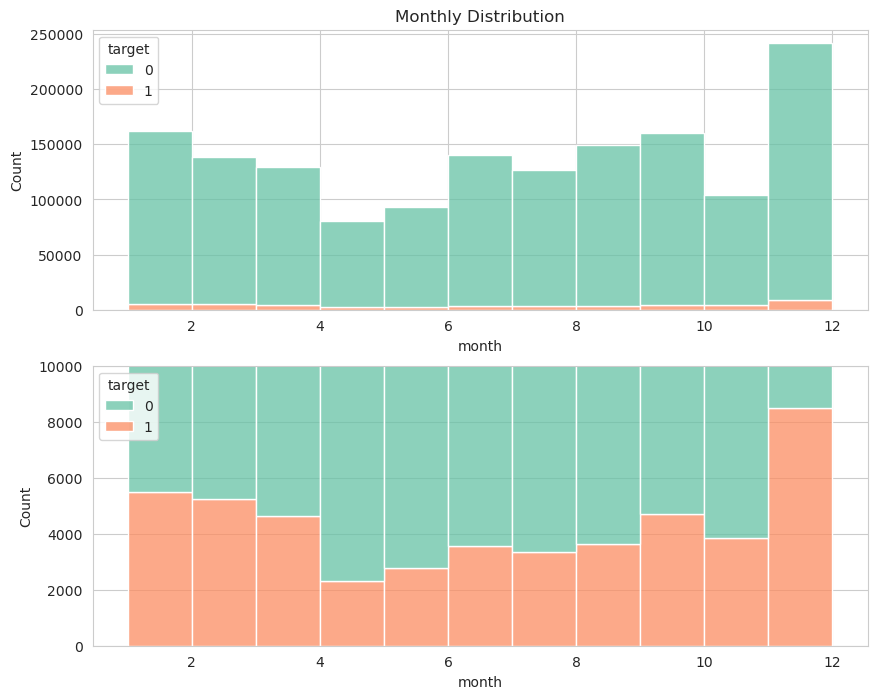

In [6]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.histplot(data=train_base, x='month', hue="target", binwidth=1, multiple="stack", palette="Set2")
plt.title("Monthly Distribution")

plt.subplot(2,1,2)
sns.histplot(data=train_base, x='month', hue="target", binwidth=1, multiple="stack", palette="Set2")
plt.ylim(0,10000)

(0.0, 2000.0)

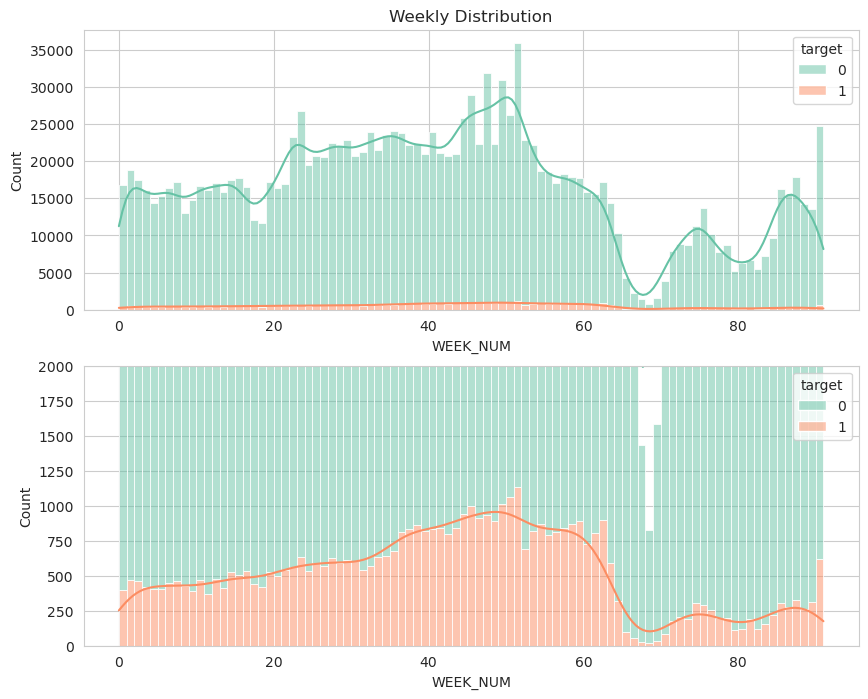

In [7]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.histplot(data=train_base, x='WEEK_NUM', hue="target", binwidth=1, kde=True, multiple="stack", palette="Set2")
plt.title("Weekly Distribution")

plt.subplot(2,1,2)
sns.histplot(data=train_base, x='WEEK_NUM', hue="target", binwidth=1, kde=True, multiple="stack", palette="Set2")
plt.ylim(0,2000)

(0.0, 2000.0)

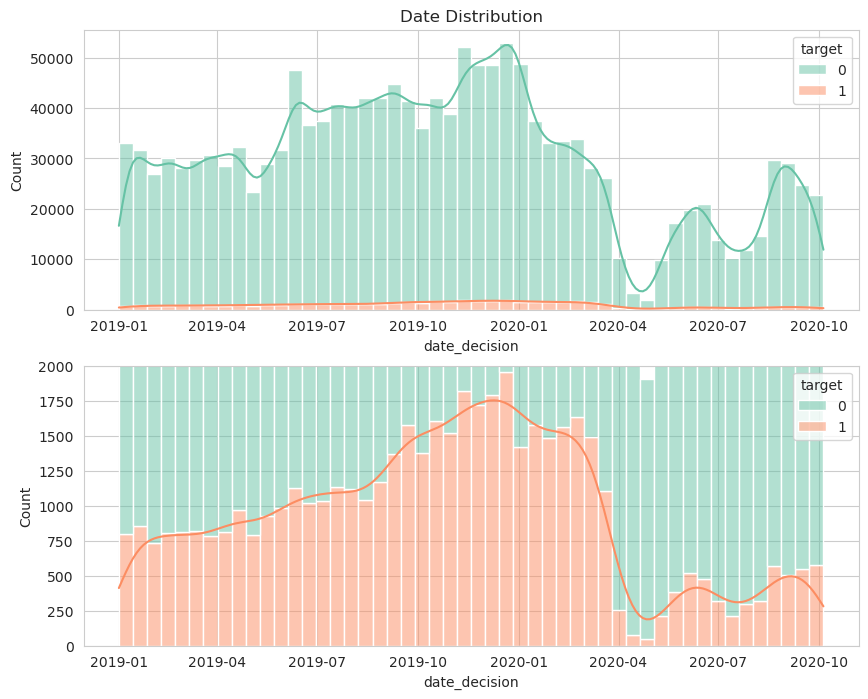

In [8]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.histplot(data=train_base, x='date_decision', hue="target", bins=50, kde=True, multiple="stack", palette="Set2")
plt.title("Date Distribution")

plt.subplot(2,1,2)
sns.histplot(data=train_base, x='date_decision', hue="target", bins=50, kde=True, multiple="stack", palette="Set2")
plt.ylim(0,2000)